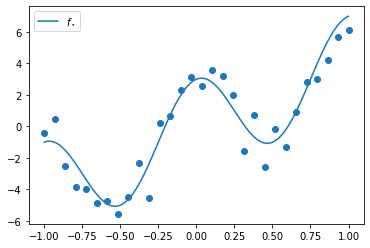

In [163]:
import numpy as np
import matplotlib.pyplot as plt

f_star = lambda x: 4*x + 3*np.cos(2*np.pi*x)
#f_star = lambda x: - 2*x**5 + 2*x**3 + 3*x
x = np.linspace(-1,1,30)
x_test = np.linspace(-1,1,1000)
f_star_x = f_star(x)
f_star_x_test = f_star(x_test)
y = f_star_x+np.random.normal(size=len(x))
plt.scatter(x, y)
plt.plot(x_test, f_star_x_test, label=r"$f_\star$")
plt.legend()
plt.show()


In [155]:
def fit_mp(X, y):
    y = y.reshape(-1, 1)
    return np.linalg.pinv(X)@y

def fit_ridge(X, y, lamb=0.05):
    y = y.reshape(-1,1)
    return np.linalg.inv(X.T@X + lamb*np.eye(X.shape[1]))@X.T@y

In [156]:
def polynomial_features(x, p):
    x = x.reshape(-1,1)
    return np.hstack([x**j for j in range(p+1)])

In [157]:

errors_mp = []
errors_ridge = []
p_range = range(1,40,1)
f_star_x_test = f_star(x_test)

for p in p_range:
    Xp = polynomial_features(x, p)
    beta_mp = fit_mp(Xp, y)
    beta_ridge = fit_ridge(Xp, y)

    Xp_test = polynomial_features(x_test, p)
    y_hat_mp = Xp_test@beta_mp
    y_hat_ridge = Xp_test@beta_ridge
    errors_mp.append(np.mean((y_hat_mp-f_star_x_test)**2))
    errors_ridge.append(np.mean((y_hat_ridge-f_star_x_test)**2))


# plt.plot(p_range, errors_mp, label="MP", marker='o')
# #plt.plot(p_range, errors_ridge, label="Ridge", marker='o')
# plt.legend()
# plt.show()

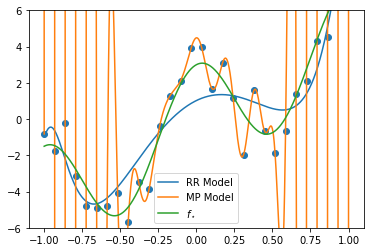

In [159]:
plt.scatter(x, y)
plt.plot(x_test, y_hat_ridge, label="RR Model")
plt.plot(x_test, y_hat_mp, label="MP Model")
plt.plot(x_test, f_star_x_test, label=f"$f_\star$")
plt.ylim(-6,6)
plt.legend()
plt.show()

In [160]:
np.random.uniform(-1,1,size=30)

array([ 0.0940047 , -0.91706898,  0.10725443, -0.66437238,  0.33130319,
       -0.59716535,  0.96205974,  0.59818495, -0.37462348, -0.99623002,
        0.20463762, -0.9722152 ,  0.00457861,  0.64180038, -0.56791503,
        0.19249942, -0.83231125,  0.73620171,  0.19186737, -0.49753362,
        0.40633524,  0.05248195, -0.87806334,  0.94028445,  0.17681184,
       -0.60629214, -0.58658904,  0.02303541,  0.33005502, -0.89473197])

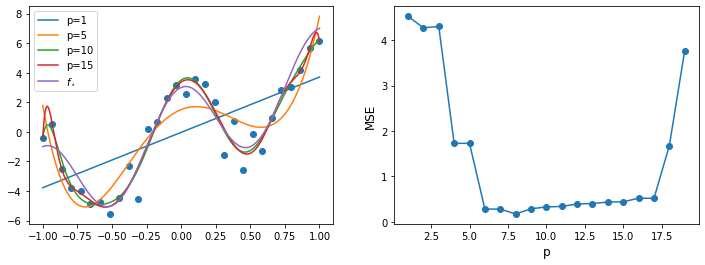

In [169]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
p_range = range(1,20,1) 

mses = []
for p in p_range:
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp)@Xp.T@y # get OLS coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    if p in [1,5,10,15,20]:
        axs[0].plot(x_test, y_hat_test, label=f"p={p}")

axs[0].scatter(x, y)
axs[0].plot(x_test, f_star(x_test), label=r"$f_\star$")
axs[0].legend()

axs[1].plot(p_range, mses, marker='o')
axs[1].set_xlabel("p", fontsize=12)
axs[1].set_ylabel("MSE", fontsize=12)
plt.show()

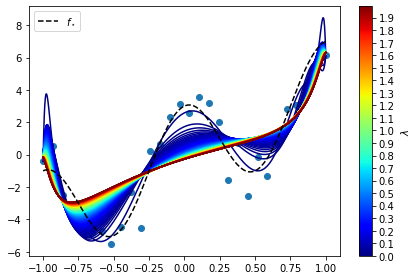

In [218]:
import matplotlib as mpl

lamb_range = np.arange(0.001, 2, 0.01) 

# get a colormap to represent the lambda values
c = np.arange(1, len(lamb_range) + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

p=50
mses = []
for ix, lamb in enumerate(lamb_range):
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp + lamb*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    plt.plot(x_test, y_hat_test, c=cmap.to_rgba(ix + 1))

cbar = plt.colorbar(cmap, ticks=range(1,len(lamb_range)+1, 10), label="$\lambda$")
cbar.ax.set_yticklabels([round(l,2) for l in lamb_range[::10]])
plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

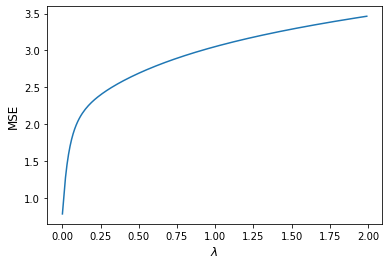

In [219]:
plt.plot(lamb_range, mses)
plt.xlabel("$\lambda$", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.show()

In [ ]:
lamb = 0.001
Xp = polynomial_features(x, p=p) # generate feature matrix
beta_hat_RR = np.linalg.inv(Xp.T@Xp + lamb*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients
beta_hat_MP = np.linalg.pinv(Xp)@y
# make predictions on test samples to compare the fitted function
Xp_test = polynomial_features(x_test, p=p)
y_hat_test = Xp_test@beta_hat
plt.plot(x_test, y_hat_test, c=cmap.to_rgba(ix + 1))
